In [499]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

### Retrieving location data of Italian restaurants using Foursquare API

In [59]:
CLIENT_ID = 'GEGSXOVEZ04FLIQN42EEEFDIDGCBNGIYZURUAUI52YPHXVYF' # your Foursquare ID
CLIENT_SECRET = 'HKJZD34KTLJRY4CLL1PCM5H220XZWCWSDKP5VWS5HH0DBVNW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GEGSXOVEZ04FLIQN42EEEFDIDGCBNGIYZURUAUI52YPHXVYF
CLIENT_SECRET:HKJZD34KTLJRY4CLL1PCM5H220XZWCWSDKP5VWS5HH0DBVNW


###### 2 listings are requested (South Brisbane & North Brisbane) and later merged into one listing

In [71]:
address_south= 'mt gravatt qld' # south Brisbane
address_north= 'chermside qld' # north Brisbane 

def get_loc(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return(latitude, longitude)

lat_north,long_north = get_loc(address_north)
lat_south,long_south = get_loc(address_south)

print('lat_north,long_north :',lat_north,long_north)
print('lat_south,long_south :',lat_south,long_south)

lat_north,long_north : -27.3863441 153.0313687
lat_south,long_south : -27.542717 153.0728955


In [478]:
search_query = 'Italian'
radius = 30000
print(search_query + ' .... OK!')

Italian .... OK!


In [479]:
import requests
url_n = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_north, long_north, VERSION, search_query, radius, LIMIT)

url_s = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_south, long_south, VERSION, search_query, radius, LIMIT)
results_n = requests.get(url_n).json()

results_s = requests.get(url_s).json()
# assign relevant part of JSON to venues
venues_n = results_n['response']['venues']

venues_s = results_s['response']['venues']
# tranform venues into a dataframe
dataframe_n = json_normalize(venues_n)

dataframe_s = json_normalize(venues_s)


In [480]:
print ('dataframe_s.shape',dataframe_s.shape)
print ('dataframe_n.shape',dataframe_n.shape)

dataframe_s.shape (39, 18)
dataframe_n.shape (38, 18)


In [481]:
df_filtered_n = dataframe_n.loc[:,['name','location.lat','location.lng','location.postalCode']]
df_filtered_s = dataframe_s.loc[:,['name','location.lat','location.lng','location.postalCode']]


In [482]:
df_filtered_n.head()

,name,location.lat,location.lng,location.postalCode
0,milany Italian Gelato,-27.381092,153.033042,NaN
1,Jamie's Italian,-27.467860,153.026561,4000
2,Italian Street Kitchen,-27.450152,153.044341,4006
3,Italiano Brothers,-27.330708,153.057651,4017
4,Cosi Italian Ristorante,-27.419230,153.055300,NaN


In [483]:
df_filtered_s.head()

,name,location.lat,location.lng,location.postalCode
0,Jamie's Italian,-27.467860,153.026561,4000
1,Toni's Italian Restaurant,-27.537700,153.078857,4122
2,Italian Street Kitchen,-27.450152,153.044341,4006
3,The Italian,-27.468197,153.093769,NaN
4,Popolo Italian Kitchen and Bar,-27.480781,153.025260,4101


In [484]:
df_filtered = pd.concat([df_filtered_n,df_filtered_s],axis = 0,ignore_index=True)

df_filtered.drop_duplicates(subset ="name",keep = 'first', inplace = True) 

df_filtered.shape

(38, 4)

In [430]:
df_filtered.set_index(np.arange(len(df_filtered)))

,name,location.lat,location.lng,location.postalCode
0,milany Italian Gelato,-27.381092,153.033042,NaN
1,Jamie's Italian,-27.467860,153.026561,4000
2,Italian Street Kitchen,-27.450152,153.044341,4006
3,Italiano Brothers,-27.330708,153.057651,4017
4,Cosi Italian Ristorante,-27.419230,153.055300,NaN
5,Italian Food Restaurant,-27.462310,153.028440,4000
6,Italian Break,-27.459943,153.001877,4101
7,Popolo Italian Kitchen and Bar,-27.480781,153.025260,4101
8,Italian Consulate,-27.471458,153.024359,4000
9,Il Molo Italian Kitchen & Bar,-27.450740,153.052600,4171


###### incorrect results are removed manually 

In [431]:
df_filtered = df_filtered[df_filtered.name != 'Italian Consulate']
df_filtered = df_filtered[df_filtered.name != 'ANFE Italian Club']            
df_filtered = df_filtered[df_filtered.name != 'ILC Italian Language Centre']
df_filtered = df_filtered[df_filtered.name != 'Casanova Italian Shoes']


In [432]:
df_filtered.set_index(np.arange(len(df_filtered)))

,name,location.lat,location.lng,location.postalCode
0,milany Italian Gelato,-27.381092,153.033042,NaN
1,Jamie's Italian,-27.467860,153.026561,4000
2,Italian Street Kitchen,-27.450152,153.044341,4006
3,Italiano Brothers,-27.330708,153.057651,4017
4,Cosi Italian Ristorante,-27.419230,153.055300,NaN
5,Italian Food Restaurant,-27.462310,153.028440,4000
6,Italian Break,-27.459943,153.001877,4101
7,Popolo Italian Kitchen and Bar,-27.480781,153.025260,4101
8,Il Molo Italian Kitchen & Bar,-27.450740,153.052600,4171
9,Marcello's Italian Restaurant,-27.228002,153.112003,4020


In [433]:
df_filtered.columns = ['name', 'lat', 'lng', 'postalCode']


In [434]:
df_filtered.dtypes

name           object
lat           float64
lng           float64
postalCode     object
dtype: object

###### Map using Folium to give a visual of the distribution

In [436]:
latitude, longitude = get_loc('Brisbane QLD')
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Brisbane CBD
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Brisbane CBD',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)



# add the Italian restaurants as blue circle markers
for lat, lng,label in zip(df_filtered.lat, df_filtered.lng,df_filtered.name):
    popup = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=popup,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map



### Retrieving location data of Italian restaurants around Brisbane using Zomato API

In [193]:
headers = {'user-key': '2da53f9cda56ad489b809e94f72d18e6'}
url_zomato = 'https://developers.zomato.com/api/v2.1/search?entity_id=298&entity_type=city&count=100&radius=50000&cuisines=55'
        
results_zomato = requests.get(url_zomato,headers = headers).json()
results_zomato

{'results_found': 490,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 16595540},
    'apikey': '2da53f9cda56ad489b809e94f72d18e6',
    'id': '16595540',
    'name': 'Julius Pizzeria',
    'url': 'https://www.zomato.com/brisbane/julius-pizzeria-south-brisbane?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '77 Grey Street, South Brisbane, Brisbane',
     'locality': 'South Brisbane',
     'city': 'Brisbane',
     'city_id': 298,
     'latitude': '-27.4736222160',
     'longitude': '153.0179620162',
     'zipcode': '4101',
     'country_id': 14,
     'locality_verbose': 'South Brisbane, Brisbane'},
    'switch_to_order_menu': 0,
    'cuisines': 'Pizza, Italian',
    'timings': '12 Noon to 9:30 PM (Tue-Wed, Sun), 12 Noon to 10 PM (Thu), 12 Noon to 10:30 PM (Fri-Sat), Mon Closed',
    'average_cost_for_two': 80,
    'price_range': 3,
    'cur

##### Due to restriction of Zomato API, listing of restaurants are obtained in 20 restaurants each time and only a maximum of 80 returned

In [399]:
range_z = list(range(1,100,20))
range_z[:]



[1, 21, 41, 61, 81]

In [250]:
headers = {'user-key': '2da53f9cda56ad489b809e94f72d18e6'}
range_cnt = list(range (5))
range_z = list(range(1,100,20))

url_zomato =[]

for i in range_cnt:
    url_zomato.append('https://developers.zomato.com/api/v2.1/search?entity_id=298&entity_type=city&start={}&count=20&radius=50000&cuisines=55'.format(range_z[i]))
   

In [251]:
results_zomato = []
for i in range_cnt:
    results_zomato.append(requests.get(url_zomato[i],headers = headers).json())

In [265]:
results_zomato[0]['restaurants'][0]

{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
   'res_id': 16590496},
  'apikey': '2da53f9cda56ad489b809e94f72d18e6',
  'id': '16590496',
  'name': 'Verve Restaurant Bar Cider House',
  'url': 'https://www.zomato.com/brisbane/verve-restaurant-bar-cider-house-brisbane-cbd?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
  'location': {'address': '109 Edward Street, Brisbane CBD, Brisbane',
   'locality': 'Brisbane CBD',
   'city': 'Brisbane',
   'city_id': 298,
   'latitude': '-27.4703610611',
   'longitude': '153.0287894234',
   'zipcode': '4001',
   'country_id': 14,
   'locality_verbose': 'Brisbane CBD, Brisbane'},
  'switch_to_order_menu': 0,
  'cuisines': 'Italian, Pizza',
  'timings': '11:30 AM to 10 PM (Tue-Wed), 11:30 AM to 11 PM (Thu), 11:30 AM to 12 Midnight (Fri), 5 PM to 11:45 PM (Sat), Mon & Sun Closed',
  'average_cost_for_two': 90,
  'price_range': 3,
  'currency': '$',
  'highlights': ['Lunch',
   'Debit Card',
   'Takeaway Availa

In [266]:
#len(results_zomato)
print(results_zomato[0]['restaurants'][0]['restaurant']['name'])
print(results_zomato[0]['restaurants'][0]['restaurant']['location']['latitude'])
print(results_zomato[0]['restaurants'][0]['restaurant']['location']['longitude'])
#.get('name')
#print(bb)

Verve Restaurant Bar Cider House
-27.4703610611
153.0287894234


In [277]:
len(results_zomato[0]['restaurants'])

20

In [307]:
name = []
lat = []
long = []

for m in list(range(len(results_zomato))) :
    for n in list(range(len(results_zomato[m]['restaurants']))):
        name.append(results_zomato[m]['restaurants'][n]['restaurant']['name'])
        lat.append(results_zomato[m]['restaurants'][n]['restaurant']['location']['latitude'])
        long.append(results_zomato[m]['restaurants'][n]['restaurant']['location']['longitude'])
    
df_1 = pd.DataFrame({'name':name,'lat':lat,'long':long})
df_1


,name,lat,long
0,Verve Restaurant Bar Cider House,-27.4703610611,153.0287894234
1,Vapiano - Albert Lane,-27.4703209022,153.0261263251
2,Beccofino,-27.4559799517,153.0497834086
3,Popolo,-27.4807495395,153.0251560360
4,Jamie's Italian,-27.4680966688,153.0267301574
5,Ristorante Tartufo,-27.4532234647,153.0401754007
6,Il Centro,-27.4696727051,153.0306056142
7,1889 Enoteca,-27.4868931061,153.0365929753
8,Pane E Vino,-27.4713302259,153.0265970528
9,Gusto Da Gianni,-27.4414211135,153.0696890876


In [308]:
df_1['lat'] = df_1['lat'].astype(float)
df_1['long'] = df_1['long'].astype(float)
df_1.dtypes

name     object
lat     float64
long    float64
dtype: object

###### Map using Folium to give a visual of the distribution

In [384]:
venues_map_z = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Brisbane CBD
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Brisbane CBD',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map_z)

# add the Italian restaurants as blue circle markers
for lat, lng,label in zip(df_1.lat, df_1.long,df_1.name):
    popup = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        popup=popup,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_z)


# display map
venues_map_z

In [313]:
latitude, longitude

(-27.4689682, 153.0234991)

In [349]:
from geopy.distance import geodesic
brisbane = (latitude, longitude)
cleveland_oh = (df_1.iloc[0,1],df_1.iloc[0,2])
print(geodesic(newport_ri, cleveland_oh).km)

0.5451949907157211


In [367]:
from geopy.distance import geodesic
brisbane = (latitude, longitude)
distance =[]

for i in list(range(len(df_1))):
    distance.append(geodesic(brisbane,(df_1.iloc[i,1],df_1.iloc[i,2])).km)
df_1['distance'] = distance

In [437]:
kclusters = 4

X = df_1.iloc[:,1:3]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

In [438]:
kmeans.labels_[:] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0])

In [439]:
df_2 = df_1[:]
df_2.insert(4,'cluster', kmeans.labels_)
df_2.head()

,name,lat,long,distance,cluster
0,Verve Restaurant Bar Cider House,-27.470361,153.028789,0.545195,0
1,Vapiano - Albert Lane,-27.470321,153.026126,0.299830,0
2,Beccofino,-27.455980,153.049783,2.970097,0
3,Popolo,-27.480750,153.025156,1.315734,0
4,Jamie's Italian,-27.468097,153.026730,0.333641,0


In [440]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_2.lat, df_2.long, df_2.name, df_2.cluster):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [371]:
df_1['distance'].describe()

count    80.000000
mean      5.066234
std       5.835402
min       0.120902
25%       1.843574
50%       2.939877
75%       6.142957
max      28.182033
Name: distance, dtype: float64

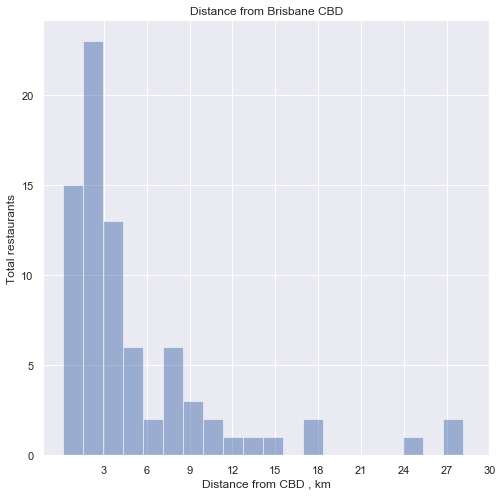

In [511]:
%matplotlib inline
x = [3,6,9,12,15,18,21,24,27,30]
fig, ax = plt.subplots(figsize = (8,8))
ax = df_1['distance'].plot.hist(bins=20, alpha=0.5)
ax.set_title('Distance from Brisbane CBD')
ax.set_xlabel('Distance from CBD , km')
ax.set_ylabel('Total restaurants')
ax.set_xticks(x)

In [447]:
df_1.head()

,name,lat,long,distance
0,Verve Restaurant Bar Cider House,-27.470361,153.028789,0.545195
1,Vapiano - Albert Lane,-27.470321,153.026126,0.299830
2,Beccofino,-27.455980,153.049783,2.970097
3,Popolo,-27.480750,153.025156,1.315734
4,Jamie's Italian,-27.468097,153.026730,0.333641


In [454]:
df_1.iloc[3,3]

1.315733554773965

In [467]:
dist3 = []

for i in list(range(len(df_1))):
    if df_1.iloc[i,3] < 3:
        dist3.append(1)
    else:
        dist3.append(0)
df_1['dist3'] = dist3
        
    

In [476]:
df_1.head()

,name,lat,long,distance,dist3
2,Beccofino,-27.455980,153.049783,2.970097,1
3,Popolo,-27.480750,153.025156,1.315734,1
4,Jamie's Italian,-27.468097,153.026730,0.333641,1
5,Ristorante Tartufo,-27.453223,153.040175,2.400241,1
6,Il Centro,-27.469673,153.030606,0.706729,1


In [477]:
# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_1.lat, df_1.long, df_1.name, df_1.dist3):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1